In [437]:
import pandas as pd
print(pd.__version__)

2.3.3


In [438]:
df =pd.read_csv( 'literacy_rates_data.csv')
df

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.0841276
...,...,...,...,...,...,...
3308,Sub-Saharan Africa,Zimbabwe,3014,15-24,male,0.8759186
3309,Sub-Saharan Africa,Zimbabwe,2014,25-64,female,0.8804848
3310,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.8972554
3311,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.7342576


In [439]:
df.columns

Index(['Region', 'Country', 'Year', 'Age', 'Gender', 'Literacy rate'], dtype='object')

In [440]:
df.shape

(3313, 6)

In [441]:
df.info

<bound method DataFrame.info of                          Region      Country  Year    Age  Gender  \
0     Central and Southern Asia  Afghanistan  2011    <15  female   
1     Central and Southern Asia  Afghanistan  2011    <15    male   
2                           NaN  Afghanistan  2011  15-24  female   
3                           NaN  Afghanistan  2011  15-24    male   
4     Central and Southern Asia  Afghanistan  2011  25-64  female   
...                         ...          ...   ...    ...     ...   
3308         Sub-Saharan Africa     Zimbabwe  3014  15-24    male   
3309         Sub-Saharan Africa     Zimbabwe  2014  25-64  female   
3310         Sub-Saharan Africa     Zimbabwe  2014  25-64    male   
3311         Sub-Saharan Africa     Zimbabwe  2014    65+  female   
3312         Sub-Saharan Africa     Zimbabwe  2014    65+    male   

     Literacy rate  
0        0.1761206  
1         0.454171  
2        0.3211322  
3        0.6187907  
4        0.0841276  
...          

In [442]:
df.duplicated().sum()         #Identifying  and addressing any duplicate values


np.int64(10)

In [443]:
df=df.drop_duplicates()

In [444]:
df.shape                 #checking whether the duplicates have been dropped (number decreases by 10)

(3303, 6)

In [445]:
df.describe()             #Ensure all columns match the data types listed in the data dictionary

,Region,Country,Year,Age,Gender,Literacy rate
count,3299,3303,3303,3303,3303,3298
unique,7,155,11,4,4,3236
top,Latin America and the Caribbean,Uruguay,2018,<15,female,1
freq,940,72,574,840,1648,19


In [446]:
df.dtypes                        # knowing the data type 

Region           object
Country          object
Year             object
Age              object
Gender           object
Literacy rate    object
dtype: object

In [447]:
df['Year'].unique()        # the year in an object buh supposed to be a int

array(['2011', '2018', '2012', '2013', '2014', '2015', '2016', '2017',
       '2010', '2011_', '3014'], dtype=object)

In [448]:
df['Year']= df['Year'].str.replace('_', '')  #converting it to a int

C:\Users\HP\AppData\Local\Temp\ipykernel_15032\2604660700.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [449]:
df['Year'] = df['Year'].astype(int)
print(df.dtypes)

Region           object
Country          object
Year              int64
Age              object
Gender           object
Literacy rate    object
dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_15032\3761659215.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [450]:
df['Literacy rate'].unique()           # literacy rate is supposed to be a float

array(['0.1761206', '0.454171', '0.3211322', ..., '0.8972554',
       '0.7342576', '0.9272311'], shape=(3237,), dtype=object)

In [451]:
df['Literacy rate']=pd.to_numeric(df['Literacy rate'],errors='coerce').astype('float64')
print(df.dtypes)

Region            object
Country           object
Year               int64
Age               object
Gender            object
Literacy rate    float64
dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_15032\2824950336.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [452]:
df['Literacy rate'].unique

<bound method Series.unique of 0       0.176121
1       0.454171
2       0.321132
3       0.618791
4       0.084128
          ...   
3308    0.875919
3309    0.880485
3310    0.897255
3311    0.734258
3312    0.927231
Name: Literacy rate, Length: 3303, dtype: float64>

In [453]:
df.nunique()                       #finding unique values

Region              7
Country           155
Year               10
Age                 4
Gender              4
Literacy rate    3235
dtype: int64

In [454]:
df['Gender'].unique()            #Identifying and addressing any inconsistencies in categorical values
                               #categorical values have no order like gender oand education

array(['female', 'male', 'F', 'M'], dtype=object)

In [455]:
df['Gender'] =df['Gender'].replace({'female':"F" , 'male':"M"})
print(df['Gender'].unique() )

['F' 'M']


C:\Users\HP\AppData\Local\Temp\ipykernel_15032\2111694091.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [456]:
df.isnull().sum()                              #Identifying and addressing any missing values in this dataset

Region           4
Country          0
Year             0
Age              0
Gender           0
Literacy rate    6
dtype: int64

In [457]:
df.dropna()

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,F,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,M,0.454171
4,Central and Southern Asia,Afghanistan,2011,25-64,F,0.084128
5,Central and Southern Asia,Afghanistan,2011,25-64,M,0.377948
6,Central and Southern Asia,Afghanistan,2011,65+,F,0.196705
...,...,...,...,...,...,...
3308,Sub-Saharan Africa,Zimbabwe,3014,15-24,M,0.875919
3309,Sub-Saharan Africa,Zimbabwe,2014,25-64,F,0.880485
3310,Sub-Saharan Africa,Zimbabwe,2014,25-64,M,0.897255
3311,Sub-Saharan Africa,Zimbabwe,2014,65+,F,0.734258


In [458]:
df['Region']= df['Region'].str.strip().str.title()         #Identifying  and addressing any inappropriate or unusual data points
print(df.describe())

              Year  Literacy rate
count  3303.000000    3297.000000
mean   2014.290948       0.817417
std      17.615461       0.234998
min    2010.000000       0.004025
25%    2011.000000       0.726916
50%    2014.000000       0.929626
75%    2016.000000       0.985504
max    3014.000000       1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_15032\2329332579.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [459]:
df[(df['Literacy rate']>= 0 ) & (df['Literacy rate'] <= 100)]

,Region,Country,Year,Age,Gender,Literacy rate
0,Central And Southern Asia,Afghanistan,2011,<15,F,0.176121
1,Central And Southern Asia,Afghanistan,2011,<15,M,0.454171
2,NaN,Afghanistan,2011,15-24,F,0.321132
3,NaN,Afghanistan,2011,15-24,M,0.618791
4,Central And Southern Asia,Afghanistan,2011,25-64,F,0.084128
...,...,...,...,...,...,...
3308,Sub-Saharan Africa,Zimbabwe,3014,15-24,M,0.875919
3309,Sub-Saharan Africa,Zimbabwe,2014,25-64,F,0.880485
3310,Sub-Saharan Africa,Zimbabwe,2014,25-64,M,0.897255
3311,Sub-Saharan Africa,Zimbabwe,2014,65+,F,0.734258


<function matplotlib.pyplot.show(close=None, block=None)>

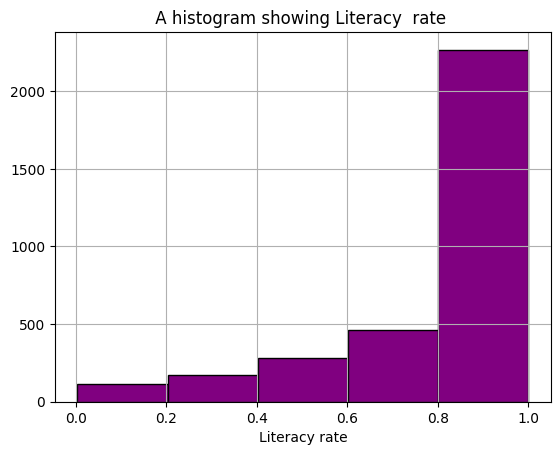

In [460]:
import pandas as pd                                                              #univariate exploratory visualisations are used for single variable buh not comparison
import matplotlib.pyplot as plt
plt.hist(df['Literacy rate'] , bins =5, color='purple' , edgecolor= 'black')    # for a histogram  more bins is equal to more detailed bars
plt.title(' A histogram showing Literacy  rate  ')                              # bins ranges the work into groups
plt.xlabel('Literacy rate')                                                       
plt.grid(True)
plt.show

Ahistogram of literarcy rate shows a positive trend over time . The literacy rate increases over time from 0.0% to a 1.0% . THis indicates that education over generation has increased.

<function matplotlib.pyplot.show(close=None, block=None)>

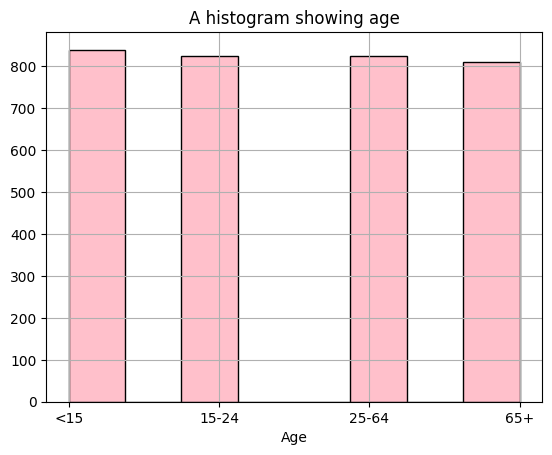

In [461]:
import pandas as pd
import matplotlib.pyplot as plt
plt.hist(df['Age'] , bins =8, color='pink' , edgecolor= 'black')                 
plt.title('A histogram showing age')                                                      
plt.xlabel('Age')                                                    
plt.grid(True)
plt.show

A histogram of age shows that peaople of 15 years and below are slightly more than other age range. 

<function matplotlib.pyplot.show(close=None, block=None)>

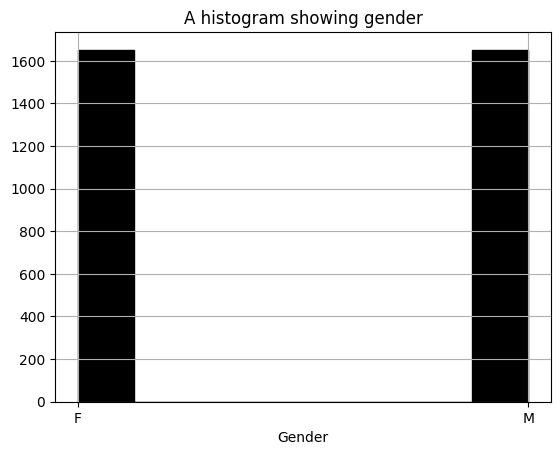

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
plt.hist(df['Gender'] , bins =8, color='black' , edgecolor= 'black')                 
plt.title('A histogram showing gender')                                                        
plt.xlabel('Gender')                                                        
plt.grid(True)
plt.show

A histogram  of gender shows that feamale are equal to male.

<function matplotlib.pyplot.show(close=None, block=None)>

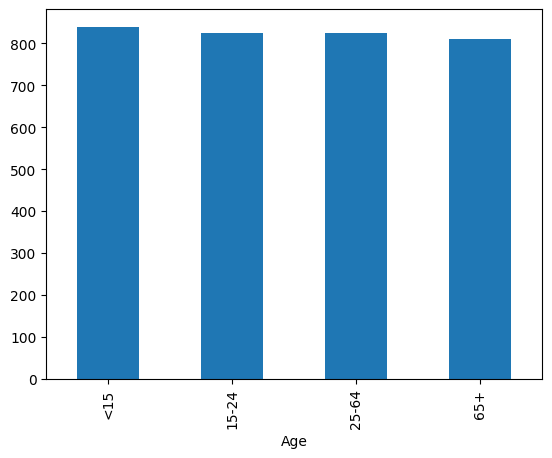

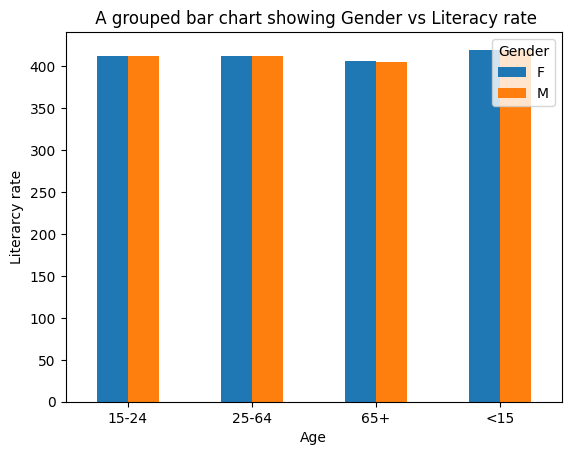

In [463]:
import matplotlib.pyplot as plt 
df['Age'] .value_counts().plot(kind='bar')        # abar chart for two categories (grouped bar chart) its a type of bar chart
cross_tab= pd.crosstab(df['Age'], df['Gender'])
cross_tab.plot(kind='bar')
plt.title(' A grouped bar chart showing Gender vs Literacy rate')
plt.xlabel('Age')
plt.ylabel('Literarcy rate')
plt.xticks(rotation=0)                
plt.show

A grouped bar chart shows how many feamles or males at a certain age with their literarcy rate.

In [464]:
import plotly.express as px                    #multivariate exploratory visualisations   
fig= px.scatter(                   #in bubble chart  variables are respented by bubbles . its used for comparison.
    x= 'Gender',
    y= 'Literacy rate',
    color='Gender',
    title='A bubble chart showing the literacy rate based on the gender',
   data_frame=df
)
fig.show()

In [465]:
import plotly.express as px                      # abubble chart
fig= px.scatter(
    x= 'Age',
    y= 'Literacy rate',
    color='Age',
    title='A bubble chart showing literacy rate based on the age',
   data_frame=df
)
fig.show()

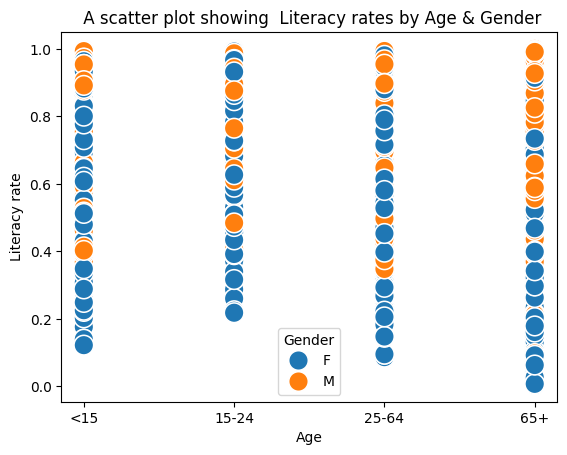

In [466]:
import seaborn as sn                 # a scatter plot shows realationships between two numeric variables
import matplotlib.pyplot as plt
sn.scatterplot(
    data=df,
    x='Age',
    y='Literacy rate',
    hue='Gender',
   
    s=200
)
plt.title(' A scatter plot showing  Literacy rates by Age & Gender')
plt.xlabel('Age')
plt.ylabel('Literacy rate')
plt.show()